In [10]:
#Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set_style("darkgrid")

In [11]:
#Read data and display 10 rows
data=pd.read_csv("hayes-roth.data",names=['name', 'hobby', 'age', 'education', 'marital-status', 'Class'])
data.head(10)

,name,hobby,age,education,marital-status,Class
0,92,2,1,1,2,1
1,10,2,1,3,2,2
2,83,3,1,4,1,3
3,61,2,4,2,2,3
4,107,1,1,3,4,3
5,113,1,1,3,2,2
6,80,3,1,3,2,2
7,125,3,4,2,4,3
8,36,2,2,1,1,1
9,105,3,2,1,1,1


<AxesSubplot:>

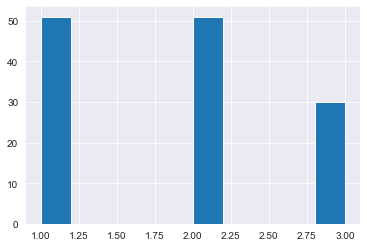

In [12]:
#Visualization
data['Class'].hist()

     name  hobby  age  education  marital-status  Class
0      92      2    1          1               2      1
1      10      2    1          3               2      2
2      83      3    1          4               1      3
3      61      2    4          2               2      3
4     107      1    1          3               4      3
..    ...    ...  ...        ...             ...    ...
127    44      1    1          4               3      3
128    40      2    1          2               1      1
129    90      1    2          1               2      2
130    21      1    2          2               1      2
131     9      3    1          1               2      1

[132 rows x 6 columns]
   name  hobby  age  education  marital-status  Class
0    92      2    1          1               2      1
1    10      2    1          3               2      2
2    83      3    1          4               1      3
3    61      2    4          2               2      3
4   107      1    1          3    

<AxesSubplot:xlabel='marital-status', ylabel='Count'>

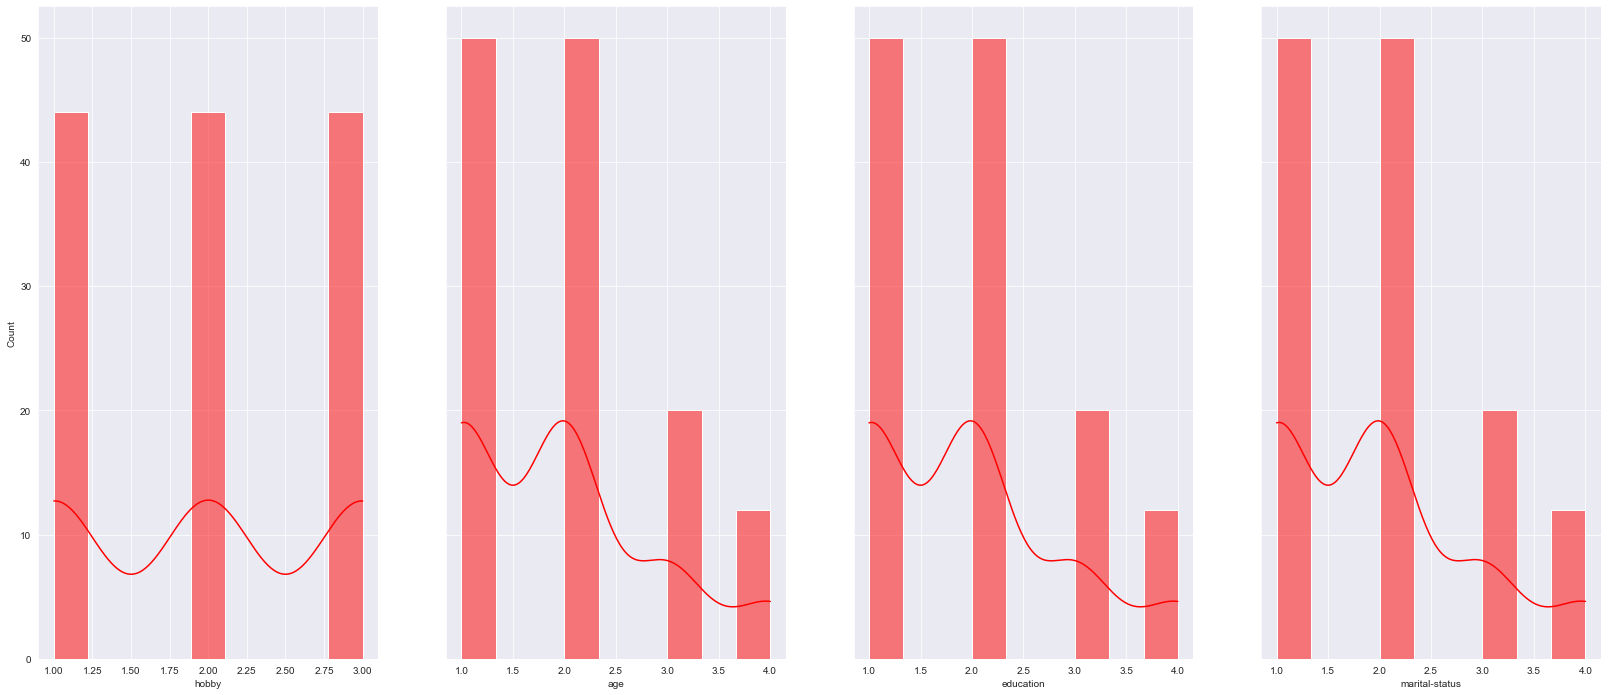

In [13]:
df = data

# Replace '?' values with NaN
df = df.replace('?', np.nan)

# Drop rows with any missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

print(df)

print(df.head())

data=df[['hobby', 'age', 'education', 'marital-status', 'Class']]

data.head(10)

fig, axes = plt.subplots(1,4, figsize=(28,12), sharey=True)
sns.histplot(data, ax=axes[0],x="hobby",kde=True, color='r')
sns.histplot(data, ax=axes[1],x="age",kde=True, color='r')
sns.histplot(data, ax=axes[2],x="education",kde=True, color='r')
sns.histplot(data, ax=axes[3],x="marital-status",kde=True, color='r')

In [14]:
class NaiveBayes:
    def fit(self, X_train, y_train):
        self.priors, self.conditional_probs = self._compute_probabilities(X_train, y_train)
        
    def predict(self, X_test):
        preds = []
        
        for _, row in X_test.iterrows():
            probs = []
            
            for class_val in self.priors.keys():
                p = self.priors[class_val]
                
                for feature, value in row.items():
                    if feature == 'Class':
                        continue
                    
                    key = (feature, value, class_val)
                    
                    if key in self.conditional_probs:
                        p *= self.conditional_probs[key]
                
                probs.append((class_val, p))
            
            preds.append(max(probs, key=lambda x: x[1])[0])
        
        return preds
    
    def _compute_probabilities(self, X, y):
        priors = dict()
        conditional_probs = dict()
        
        n_samples = X.shape[0]
        
        # Compute the prior probabilities for each class
        for class_val in y.unique():
            priors[class_val] = (y == class_val).sum() / n_samples
        
        # Compute the conditional probabilities for each feature and class
        for feature in X.columns:
            if feature == 'Class':
                continue
                
            for feature_val in X[feature].unique():
                for class_val in y.unique():
                    num = ((X[feature] == feature_val) & (y == class_val)).sum() + 1
                    denom = (y == class_val).sum() + X[feature].nunique()
                    
                    key = (feature, feature_val, class_val)
                    conditional_probs[key] = num / denom
        
        return priors, conditional_probs
    

In [15]:
# Split the data into X (features) and y (target)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=46)

# Train a Naive Bayes classifier on the training data
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)
print(y_pred)

[3, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 3, 2, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 3, 3, 1]


In [16]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8148148148148148


In [17]:
def validationOfNaiveBayes(X, y, n_folds=10):
    scores = []
    fold_size = X.shape[0] // n_folds
    
    for i in range(n_folds):
        start = i * fold_size
        end = (i+1) * fold_size
        
        X_test = X.iloc[start:end]
        y_test = y.iloc[start:end]
        X_train = X.drop(X.index[start:end])
        y_train = y.drop(y.index[start:end])
        
        model = NaiveBayes()
        model.fit(X_train, y_train)
        
        preds = model.predict(X_test)
        score = np.mean(preds == y_test)
        scores.append(score)
    
    return scores

In [18]:
scores = validationOfNaiveBayes(X_train, y_train)

for score in scores:
    print(round(score,3))
mean_score = np.mean(scores)
print(f"Mean score: {mean_score:.3f}")
print("Accuracy = ",round(mean_score*100,2))

0.9
0.8
1.0
0.7
0.9
0.5
0.9
0.8
0.8
0.8
Mean score: 0.810
Accuracy =  81.0
